In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sms = pd.read_csv('dataset_sms_spam _v1.csv')

In [4]:
sms.head()

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


In [5]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
Teks     1143 non-null object
label    1143 non-null int64
dtypes: int64(1), object(1)
memory usage: 17.9+ KB


In [6]:
sms['Length'] = sms['Teks'].apply(len)

In [7]:
sms.head()

,Teks,label,Length
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,153
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,152
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,152
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,153
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,113


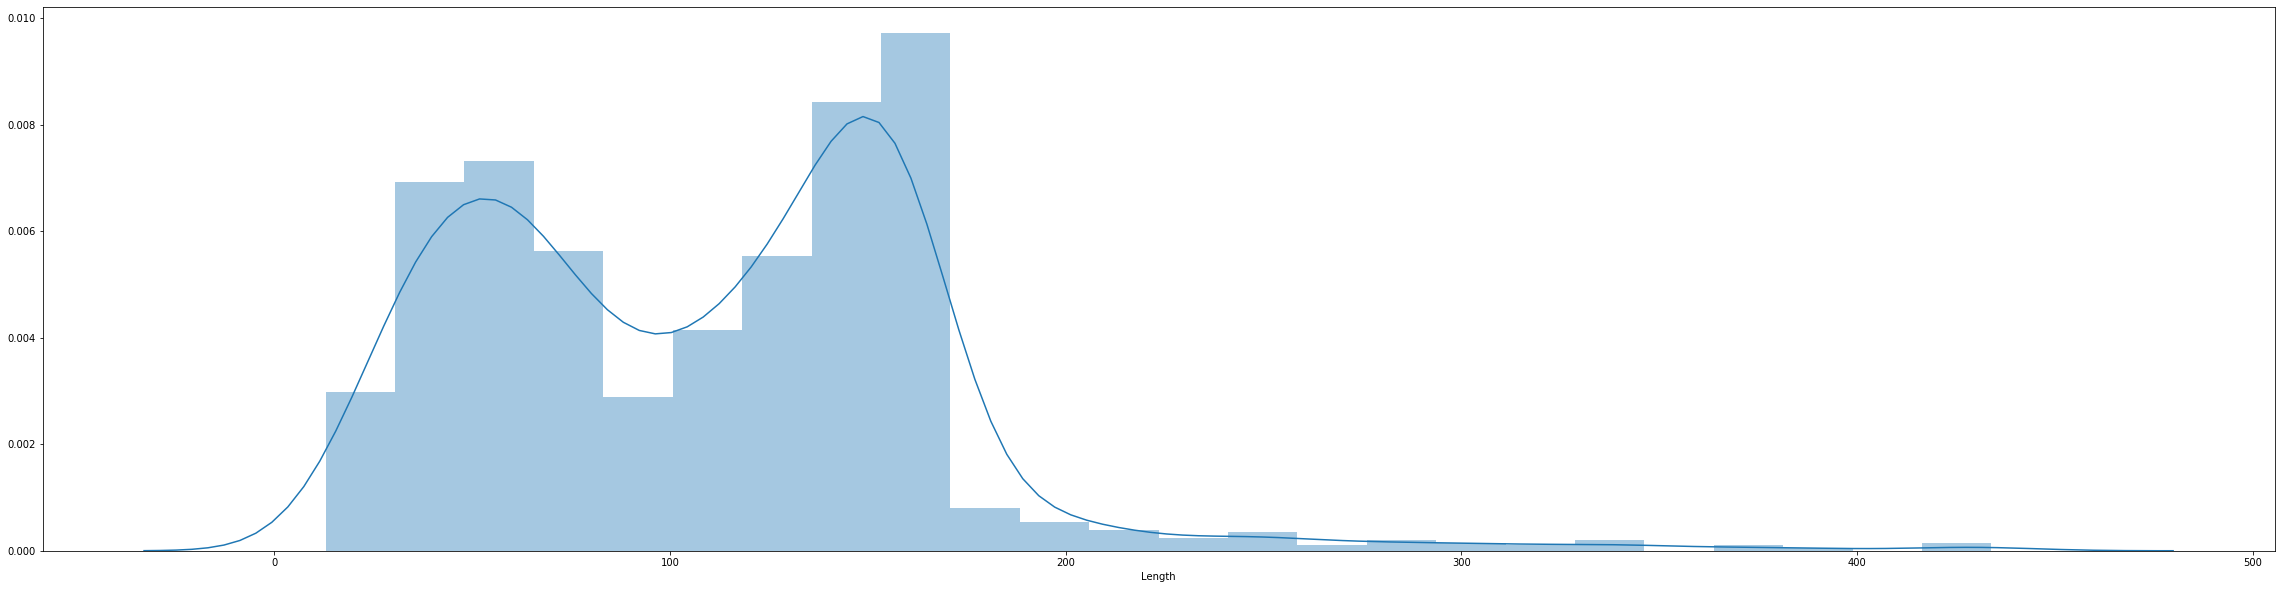

In [8]:
plt.figure(figsize=(40,10))
sns.distplot(sms['Length'])

In [9]:
sms['Length'].describe()

count    1143.000000
mean      108.736658
std        59.076768
min        13.000000
25%        58.000000
50%       113.000000
75%       152.000000
max       434.000000
Name: Length, dtype: float64

In [10]:
sms[sms['Length']==434]['Teks'].iloc[0]

"pesan dari nama1 : Assalamu'alaikum wr.wb. Pak, Indonesia Android Kejar bekerjasama dengan Depilkom mau mengadakan pelatihan Android level intermediate, masih ada slot 2 orang lagi, syaratnya sudah pernah membuat app android dan ngebuild menggunakan Android Studio, barang kali di kelas Bapak ada yang berminat. Nuhun.o ya pelatihannya mulai hari sabtu besok, 2 April, setiap sabtu selama 7 pertemuan, bertempat di lab praktikum kita."

In [11]:
sms[sms['Length']==13]['Teks'].iloc[0]

'Aku di pt. DI'

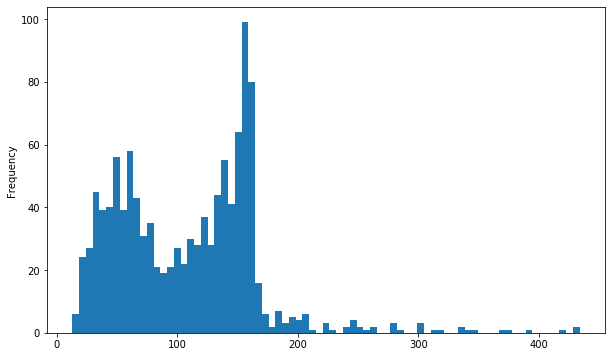

In [12]:
plt.figure(figsize=(10,6))
sms['Length'].plot(bins=75,kind='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023363598D68>,
      dtype=object)

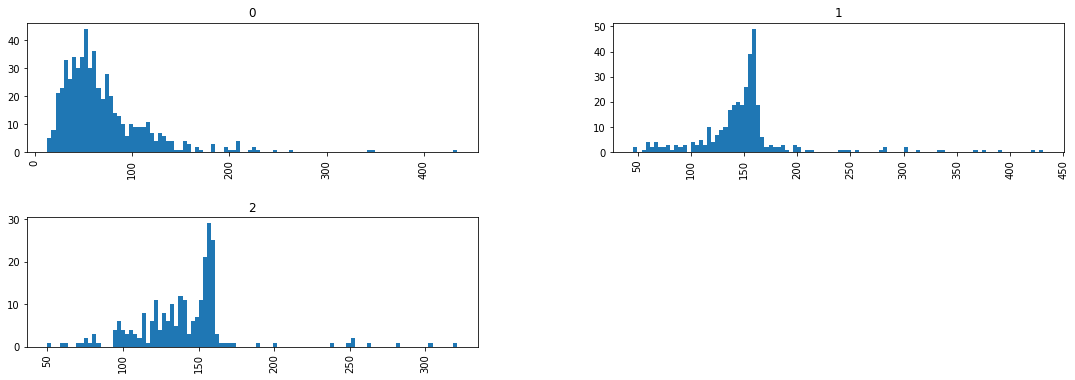

In [13]:
sms.hist(column='Length',by='label',bins=100,figsize=(18,6))

In [14]:
sms.groupby('label').describe()

Length                                                         
       count        mean        std   min    25%    50%    75%    max
label                                                                
0      569.0   70.544815  46.230270  13.0   42.0   59.0   84.0  434.0
1      335.0  150.835821  49.443731  46.0  134.5  151.0  159.0  431.0
2      239.0  140.652720  34.788568  50.0  123.0  142.0  156.0  321.0

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = sms['Teks']
y = sms['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [18]:
multinomial_pipeline = Pipeline([
    ('cv', CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])
logreg_pipeline = Pipeline([
    ('cv', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression(solver='lbfgs', multi_class='auto'))
])
sgdc_pipeline = Pipeline([
    ('cv', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))
])

In [19]:
multinomial_pipeline.fit(X_train,y_train)
sgdc_pipeline.fit(X_train,y_train)
logreg_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=

In [20]:
multinomial_prediksi = multinomial_pipeline.predict(X_test)
sgdc_prediksi = sgdc_pipeline.predict(X_test)
logreg_prediksi = logreg_pipeline.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print('Dengan menggunakan MultinomialNB')
print('\n')
print(classification_report(y_test,multinomial_prediksi))
print(confusion_matrix(y_test,multinomial_prediksi))

Dengan menggunakan MultinomialNB


              precision    recall  f1-score   support

           0       0.94      0.93      0.93        99
           1       0.97      0.89      0.93        82
           2       0.80      0.94      0.87        48

    accuracy                           0.92       229
   macro avg       0.91      0.92      0.91       229
weighted avg       0.92      0.92      0.92       229

[[92  2  5]
 [ 3 73  6]
 [ 3  0 45]]


In [23]:
print('Dengan menggunakan Stochastic Gradient Descent Classifier')
print('\n')
print(classification_report(y_test,sgdc_prediksi))
print(confusion_matrix(y_test,sgdc_prediksi))

Dengan menggunakan Stochastic Gradient Descent Classifier


              precision    recall  f1-score   support

           0       0.96      0.95      0.95        99
           1       0.99      0.91      0.95        82
           2       0.80      0.92      0.85        48

    accuracy                           0.93       229
   macro avg       0.92      0.93      0.92       229
weighted avg       0.94      0.93      0.93       229

[[94  0  5]
 [ 1 75  6]
 [ 3  1 44]]


In [24]:
print('Dengan menggunakan Logistic Regression')
print('\n')
print(classification_report(y_test,logreg_prediksi))
print(confusion_matrix(y_test,logreg_prediksi))

Dengan menggunakan Logistic Regression


              precision    recall  f1-score   support

           0       0.89      0.95      0.92        99
           1       0.97      0.87      0.92        82
           2       0.80      0.83      0.82        48

    accuracy                           0.90       229
   macro avg       0.89      0.88      0.88       229
weighted avg       0.90      0.90      0.90       229

[[94  1  4]
 [ 5 71  6]
 [ 7  1 40]]


In [25]:
sms_baru = [
    'Pelanggan Yth. Anda mendapat 36 poin atas pembayaran KartuHalo sebesar 187000. Masa berlaku s.d 31-Dec-19',
    'Ndut lw dimana dah sekarang?',
    "Dapatkan Rp100rb saldo+10free game(total senilai Rp200rb)hanya dengan membayar Rp 100rb.Berlaku di bulan Jul'19.Tukarkan segera di Timezone hari ini. Promo*606#",
    "Ini lagi jln pulang",
    "Beli 6 GRATIS 6 donut dari DUNKIN DONUTS Edutown BSD City. Tukarkan SMS ini segera. Hanya berlaku hari ini.",
    "Untuk di perluas PLGGAN SHOPEE Slmt Anda M.dpkn Penghargaan Dari shopee Pada Hari ini Cek 125jt Pin Anda(AAQ2099) U/info Klik :tiny.cc/undian:shopee919",
    "Dapatkan Rp 100rb saldo+free game (total senilai Rp 200rb) hanya dengan membayar 100rb. Berlaku di bulan Jul'19. Tukarkan segera di Timezone hari ini.",
    "YTH bpk/ibu,dptkan PINJAMAN TUNAI dengan menjaminkan BPKB mobil/motor,syarat mudah,proses 3 jam cair.hub AYUNG 021-xxxxx.abaikan sms ini bila tdk berminat",
    "Selamat!anda mdptkan satu unit MOBIL NISSAN JUKE dr PT.INDOFOOD pin_anda 27tdn55 u/info pengambilan Hadiah, kunjungi website www.popmieget-lucky.blogspot.com "
]

In [26]:
prediksi_data_baru = sgdc_pipeline.predict(sms_baru)

In [27]:
print("Hasil prediksi sms anda yaitu : {}".format(prediksi_data_baru))

Hasil prediksi sms anda yaitu : [0 0 2 0 2 1 2 1 1]


In [28]:
import joblib

In [29]:
joblib.dump(sgdc_pipeline, 'model_sgdc_spam')

['model_sgdc_spam']

In [ ]:
prediksi_data_baru